# Information Regarding Datase

Novel Corona Virus (COVID-19) epidemiological data since 22 January 2020. The data is compiled by the Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) from various sources including the World Health Organization (WHO), DXY.cn. Pneumonia. 2020, BNO News, National Health Commission of the People’s Republic of China (NHC), China CDC (CCDC), Hong Kong Department of Health, Macau Government, Taiwan CDC, US CDC, Government of Canada, Australia Government Department of Health, European Centre for Disease Prevention and Control (ECDC), Ministry of Health Singapore (MOH). JSU CCSE maintains the data on the 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository on github. Fields available in the data include Province/State, Country/Region, Last Update, Confirmed, Suspected, Recovered, Deaths.

Links: - 
* https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series

## Data set Contains three files
* Confirmed Cases
* Deaths Cases
* Recoverd Cases

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
%matplotlib inline 

In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/RenzoGuzman/Files-COVID-19-Peru/master/time_series_covid19_confirmed_peru_vf.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/RenzoGuzman/Files-COVID-19-Peru/master/time_series_covid19_deaths_peru_vf.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/RenzoGuzman/Files-COVID-19-Peru/master/time_series_covid19_recovered_peru_vf.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Peru,-9.19,-75.0152,1,1,6,7,11,11,15,28,38,43,86,117,145,234,234,318,363,395,416,480,580,635,671,852,950,1065,1323,1414,1595,1746,2281,2561,2954,4342,5256,5897,6848,7519,9784,10303,11475,12491,13489,14420


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,5,5,7,9,9,11,16,18,24,30,38,55,61,73,83,92,107,121,138,169,181,193,216,230,254,274,300,348


In [0]:
cols = confirmed_df.keys()

## Storing the values of dates only 

In [0]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

## Total number of cases, death recoveries

In [0]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

## Reshaping data 

In [0]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# EDA

In [9]:
confirmed.isna().sum()

3/6/20     0
3/7/20     0
3/8/20     0
3/9/20     0
3/10/20    0
3/11/20    0
3/12/20    0
3/13/20    0
3/14/20    0
3/15/20    0
3/16/20    0
3/17/20    0
3/18/20    0
3/19/20    0
3/20/20    0
3/21/20    0
3/22/20    0
3/23/20    0
3/24/20    0
3/25/20    0
3/26/20    0
3/27/20    0
3/28/20    0
3/29/20    0
3/30/20    0
3/31/20    0
4/1/20     0
4/2/20     0
4/3/20     0
4/4/20     0
4/5/20     0
4/6/20     0
4/7/20     0
4/8/20     0
4/9/20     0
4/10/20    0
4/11/20    0
4/12/20    0
4/13/20    0
4/14/20    0
4/15/20    0
4/16/20    0
4/17/20    0
4/18/20    0
dtype: int64

In [0]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [0]:
start = '3/06/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

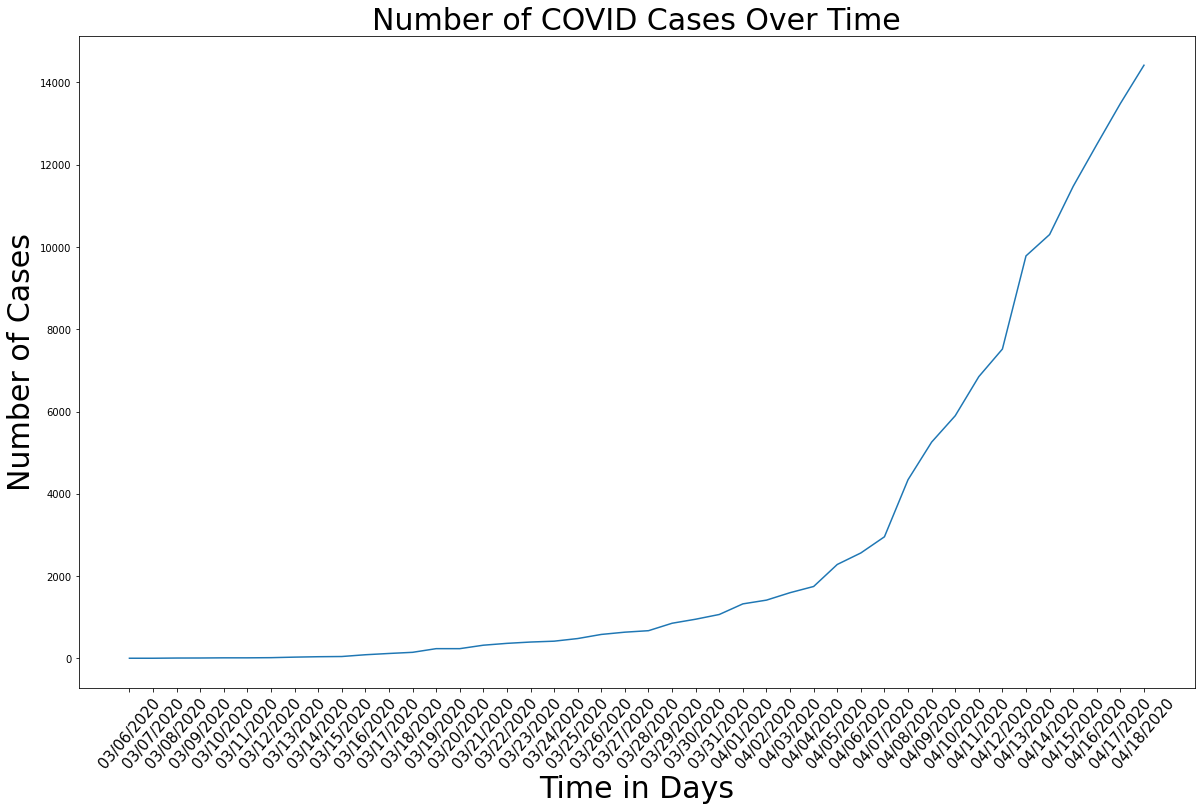

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of COVID Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

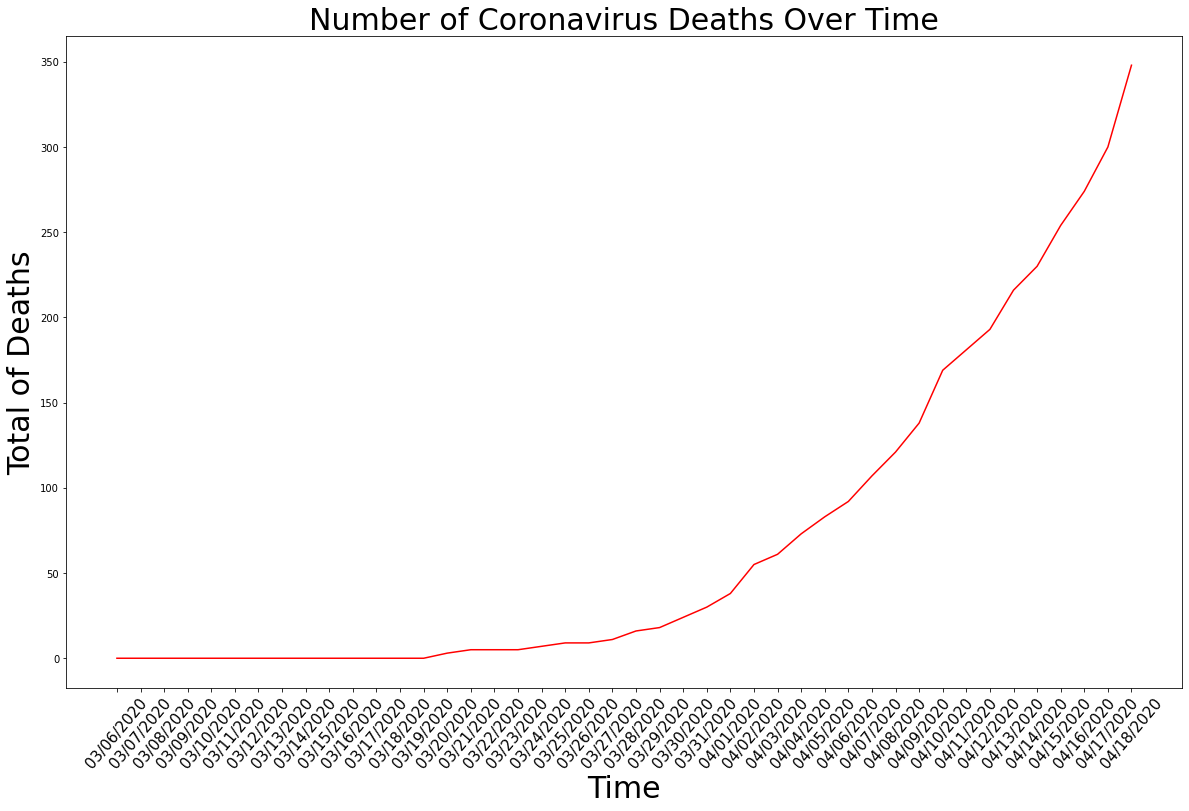

In [13]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Total of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

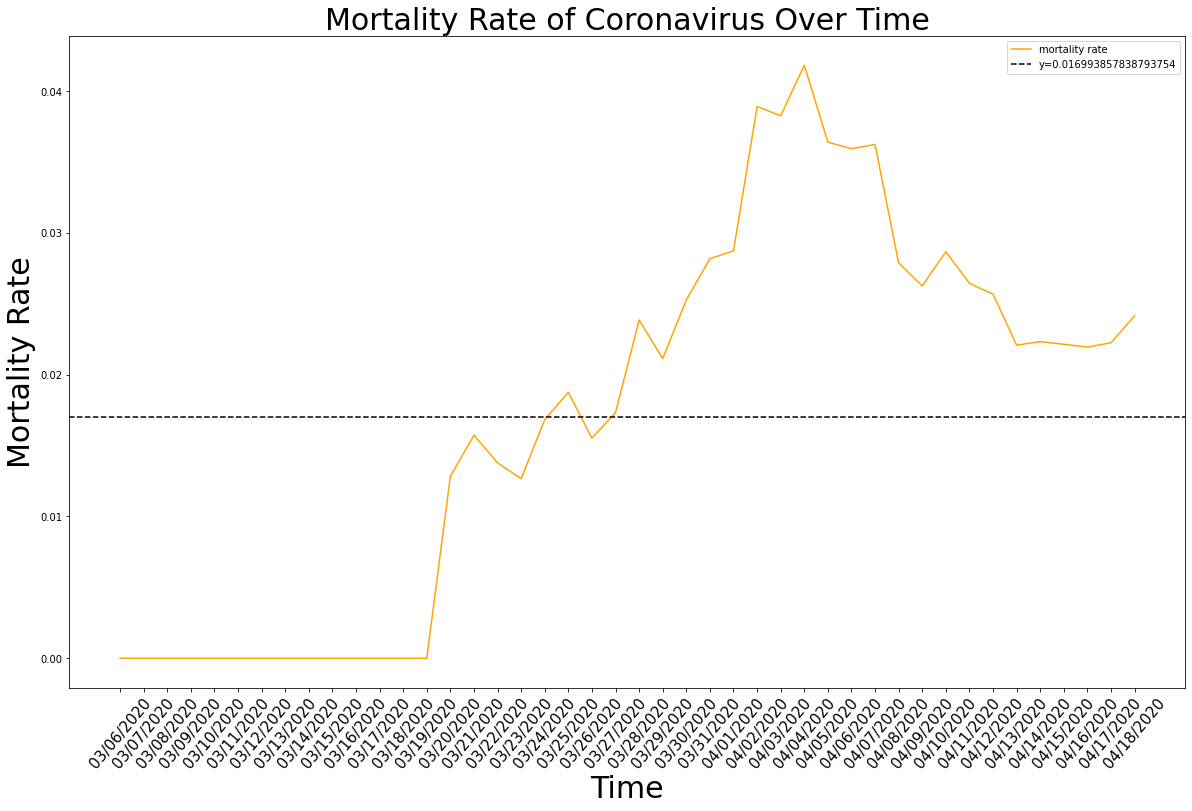

In [14]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

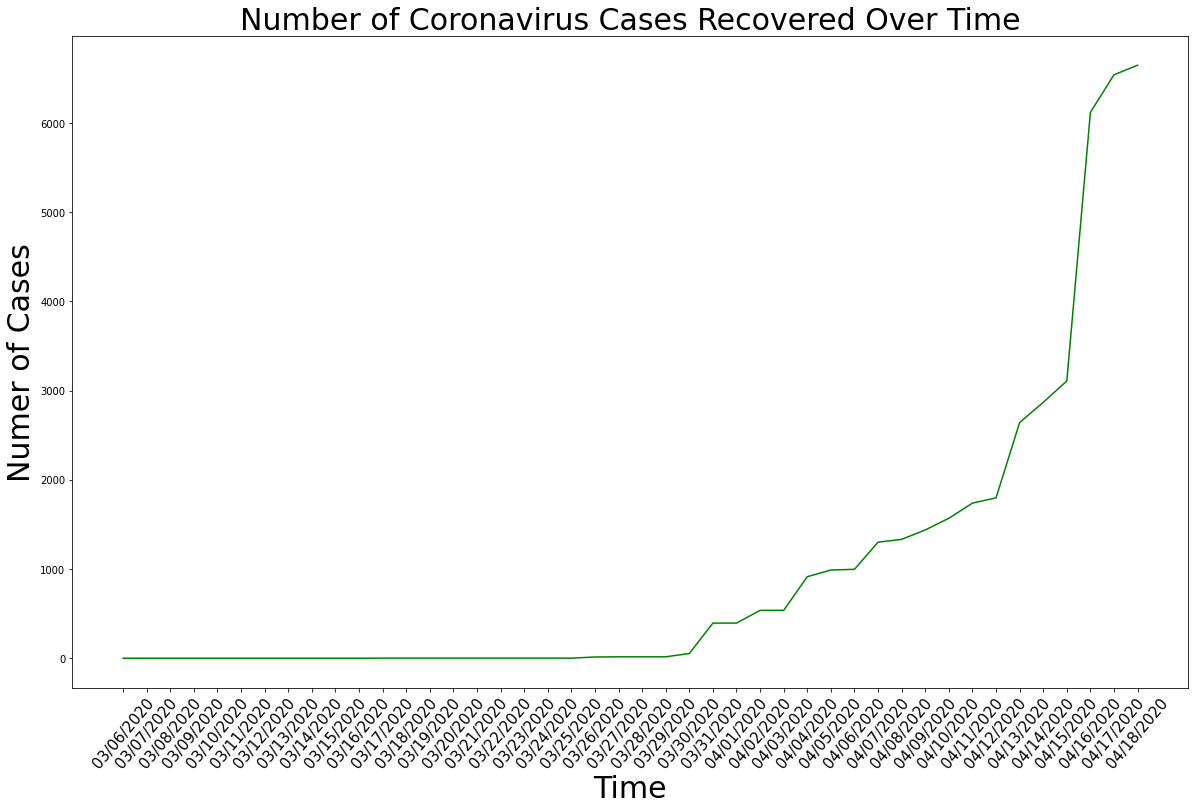

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Numer of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

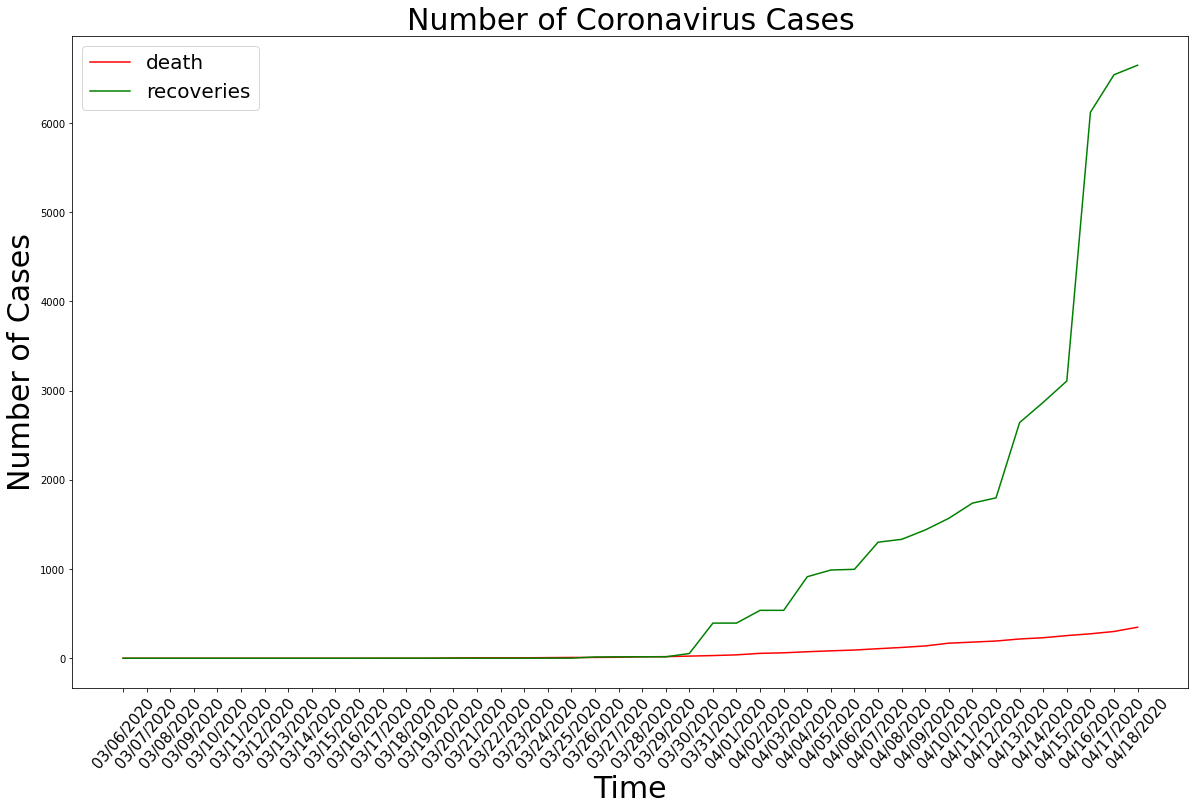

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

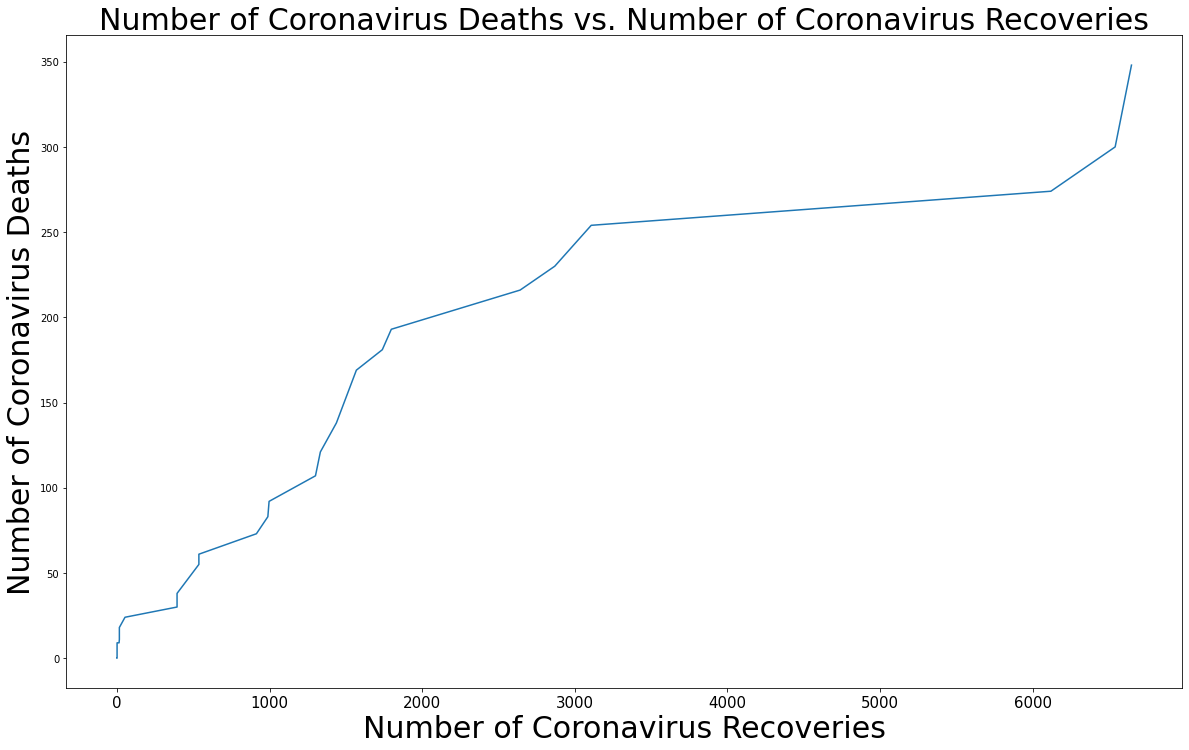

In [18]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [0]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [20]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

NameError: ignored

In [21]:
# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

NameError: ignored

# Predictions

## Training and Testing 

## Spliting dataset

In [0]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False) 

In [23]:
X_train_confirmed.shape, y_train_confirmed.shape, X_test_confirmed.shape, y_test_confirmed.shape

((41, 1), (41, 1), (3, 1), (3, 1))

# SVM for Regression

### Hyperparameter tuning using randomsearch cv

In [24]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=100, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [25]:
svm_search.best_params_

{'C': 1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'linear', 'shrinking': True}

In [0]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

# Linear Regression Model

In [27]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 8060.394037940379
MSE: 65435886.04229262


In [28]:
linear_model.coef_

array([[128.72077687]])

# Random Forest Regession Model

In [29]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],}

# Instantiate RandomizedSearchCV model
rfr_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rfr_model.fit(X_train_confirmed, y_train_confirmed)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selectio

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [30]:
test_rfr_pred = rfr_model.predict(X_test_confirmed)
rfr_pred = rfr_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_rfr_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_rfr_pred, y_test_confirmed))

MAE: 3350.1044444444437
MSE: 11843622.677575305


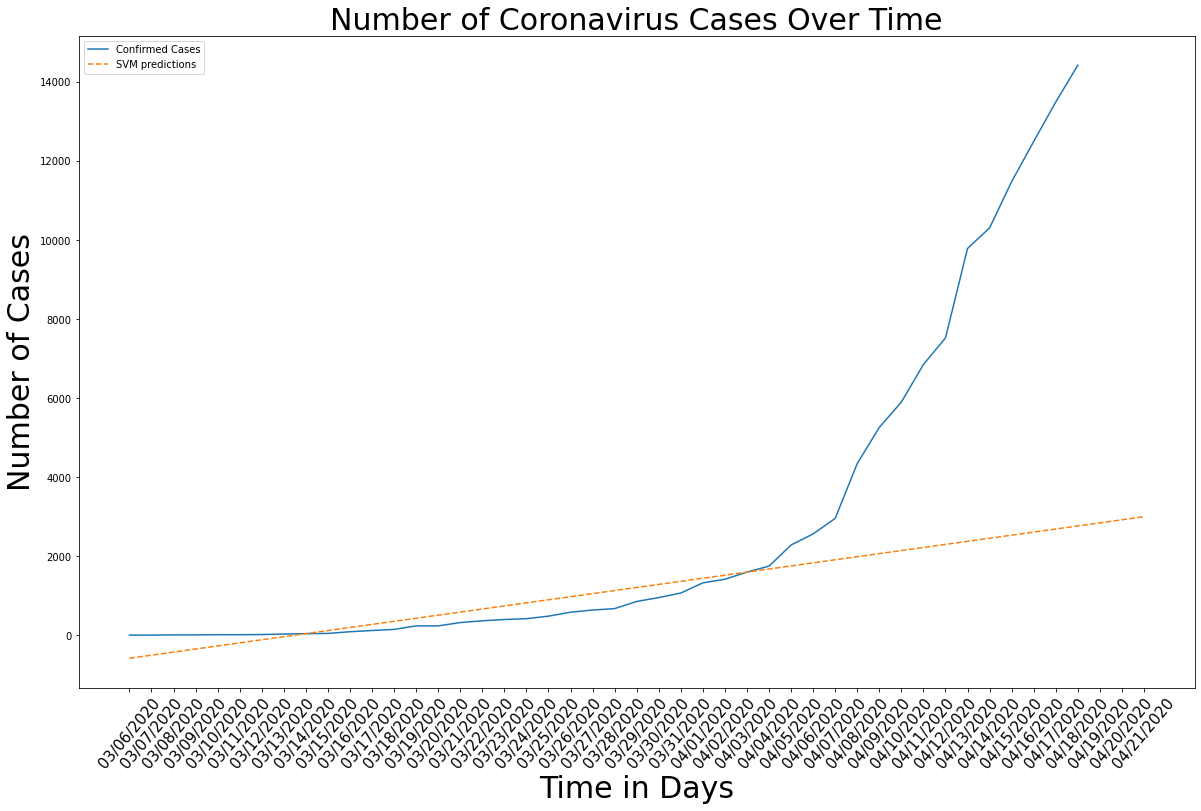

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

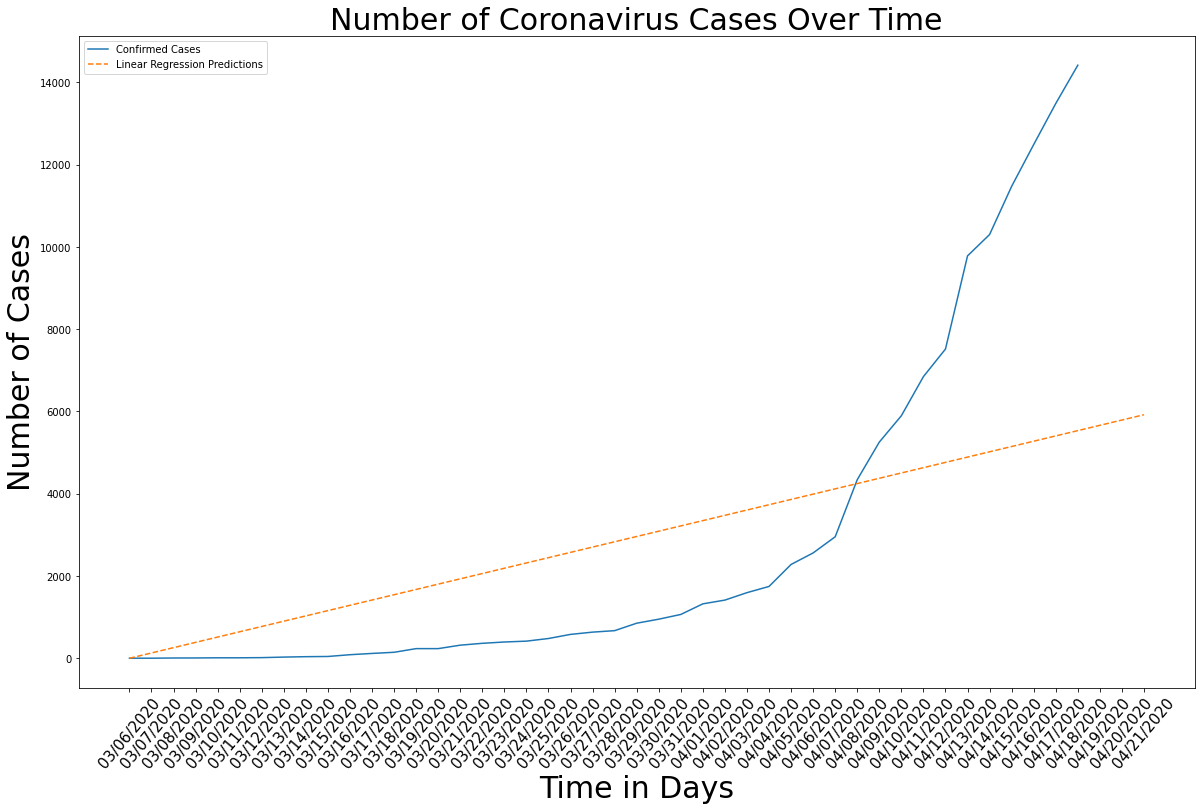

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, linear_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

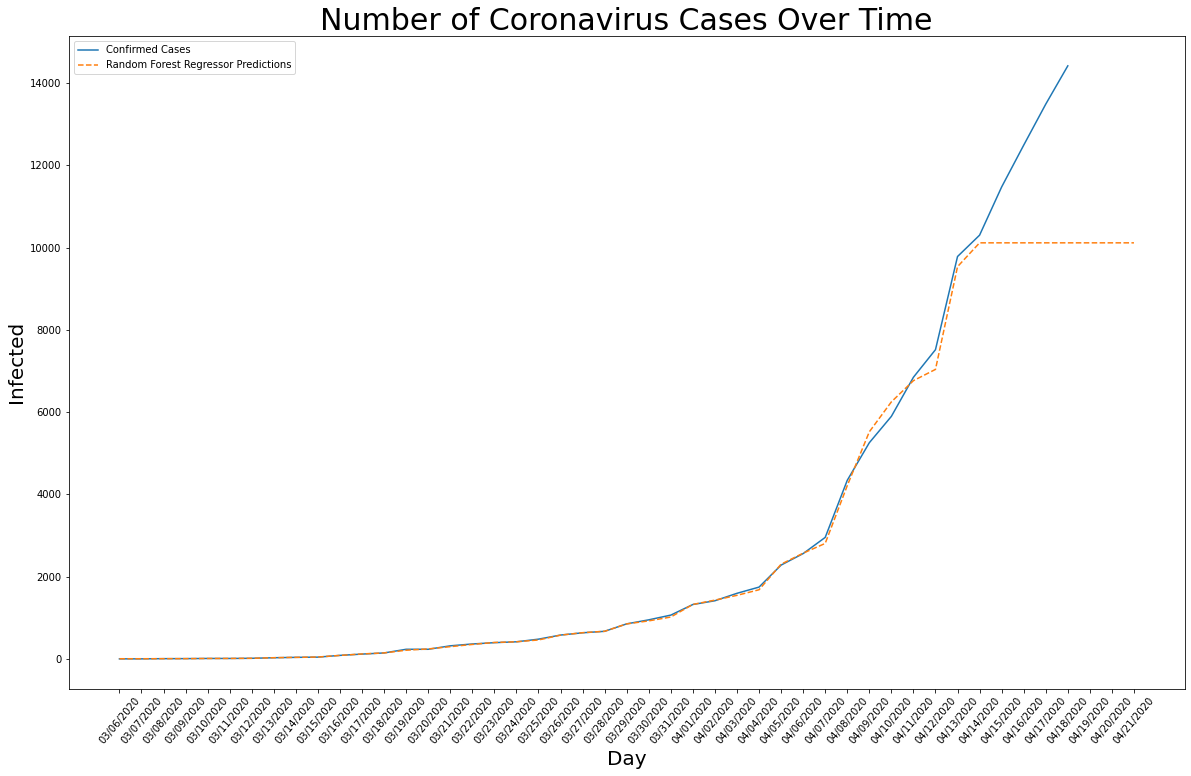

In [33]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Day', size=20)
plt.ylabel('Infected', size=20)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions'])
plt.xticks(rotation=50, size=10)
plt.show()

In [34]:
rfr_pred

array([4.26071429e+00, 4.26071429e+00, 5.63515873e+00, 6.60849206e+00,
       1.01211376e+01, 1.14803968e+01, 1.45624868e+01, 2.94854894e+01,
       3.73710450e+01, 4.57928968e+01, 8.48670635e+01, 1.20674233e+02,
       1.45392937e+02, 2.11207354e+02, 2.42312540e+02, 2.97610635e+02,
       3.51672610e+02, 3.99842293e+02, 4.16303774e+02, 4.60660238e+02,
       5.78060741e+02, 6.37332593e+02, 6.71719630e+02, 8.51147275e+02,
       9.24720608e+02, 1.01854690e+03, 1.32459246e+03, 1.42940933e+03,
       1.54559267e+03, 1.68131071e+03, 2.30252057e+03, 2.57089307e+03,
       2.80804955e+03, 4.21244450e+03, 5.52129381e+03, 6.24951529e+03,
       6.76551812e+03, 7.03920812e+03, 9.53712093e+03, 1.01165622e+04,
       1.01165622e+04, 1.01165622e+04, 1.01165622e+04, 1.01165622e+04,
       1.01165622e+04, 1.01165622e+04, 1.01165622e+04])

In [0]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-4:], rfr_pred[-4:])))

Random Forest Regessor prediction:  {('04/17/2020', 6594.3068095238095), ('04/16/2020', 6594.3068095238095), ('04/14/2020', 6594.3068095238095), ('04/15/2020', 6594.3068095238095)}
